# Task 1:
read the dataset and determine the optimal amount of clusters.

In [1]:
import pandas
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

data = pandas.read_csv("data/expanded")
X = pandas.get_dummies(data.drop('edibility', axis='columns')).to_numpy()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X2 = pca.transform(X)
scores = []

for i in range(0, 10):
    kmeans = KMeans(n_clusters=i+2)
    kmeans.fit(X2)
    predicted = kmeans.predict(X2)
    scores.append(silhouette_score(X2, kmeans.fit_predict(X2)))
optimal_clusters = scores.index(max(scores))+2
print("Optimal number of clusters: ", optimal_clusters)

Optimal number of clusters:  4


# Task 2
Plot the score

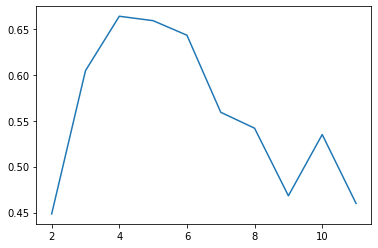

In [9]:
x_values = [x for x in range(2, 12)]

plt.plot(x_values, scores)


# Task 3
Plot the clusters using the optimal number of clusters and the PCA of X.

(8124,)
(8124, 3)
(8124, 117)
(4, 3)
-0.7047380662626268 -0.37668955109486746 0.9490212201518162
2.05401963029493 -1.2070776641479422 -0.4975832672314961
1.019545878625599 2.6021876126740113 0.1496039527562466
-1.485108663466318 -0.020226865501439414 -1.3772269692892427


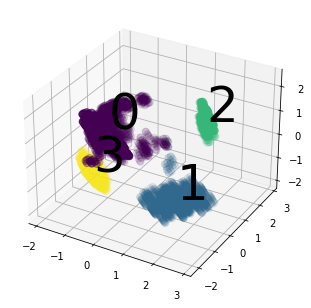

In [8]:
fig2 = plt.figure()
ax2 = Axes3D(fig2)
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)

ax2.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=y_kmeans, s=50, alpha=0.1, cmap='viridis')
centers = kmeans.cluster_centers_
print(y_kmeans.shape)
print(X2.shape)
print(X.shape)
print(centers.shape)

for i in range(0, optimal_clusters):
    print(centers[i, 0], centers[i, 1], centers[i,2])
    ax2.text(centers[i, 0], centers[i, 1], centers[i, 2], '%s' % str(i), size=50)
